# Image Colorization (2 points)

## Goals:

* Use alpha version
* Use beta version
* Use final version

---

## Understand:

* How to load the inception net
* How to merge encoder and inception result
* Use image functions to obtain lab space
* Create an appropiate data augmentation

---

## Links:

* https://blog.floydhub.com/colorizing-b-w-photos-with-neural-networks/
* https://github.com/emilwallner/Coloring-greyscale-images
* https://github.com/RParedesPalacios/ComputerVisionLab/blob/master/notebook/colorization.ipynb


In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

## Alpha version

Image color memorization

In [11]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Get images 400x400 pixels
directory = 'dataset_coloring/alpha_version/'
path = directory + 'woman.png'
image = img_to_array(load_img(path))
image = np.array(image, dtype=float)

X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [4]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

# Finish model
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 8)     80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 8)     584       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 32)    0

In [5]:
# Training and Evaluation
model.fit(x=X,
          y=Y,
          batch_size=1, 
          epochs=1000)

print(model.evaluate(X, Y, batch_size=1))

Epoch 1/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2964
Epoch 2/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2517
Epoch 3/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1081
Epoch 4/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0083
Epoch 5/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0078
Epoch 6/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0074
Epoch 7/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0070
Epoch 8/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0068
Epoch 9/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0066
Epoch 10/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0064
Epoch 11/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0062
Epoch 12/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0060
Epoch 13/1000
1/1 [===================

1/1 [==============================] - 0s 24ms/step - loss: 0.0018
Epoch 203/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0014
Epoch 204/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012
Epoch 205/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0012
Epoch 206/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012
Epoch 207/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013
Epoch 208/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0015
Epoch 209/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0021
Epoch 210/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0013
Epoch 211/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0013
Epoch 212/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0015
Epoch 213/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0018
Epoch 214/1000
1/1 [===========

1/1 [==============================] - 0s 22ms/step - loss: 8.2779e-04
Epoch 399/1000
1/1 [==============================] - 0s 22ms/step - loss: 8.1244e-04
Epoch 400/1000
1/1 [==============================] - 0s 26ms/step - loss: 9.8491e-04
Epoch 401/1000
1/1 [==============================] - 0s 24ms/step - loss: 9.7159e-04
Epoch 402/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011
Epoch 403/1000
1/1 [==============================] - 0s 23ms/step - loss: 9.8107e-04
Epoch 404/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011
Epoch 405/1000
1/1 [==============================] - 0s 24ms/step - loss: 9.8805e-04
Epoch 406/1000
1/1 [==============================] - ETA: 0s - loss: 9.7347e-0 - 0s 23ms/step - loss: 9.7347e-04
Epoch 407/1000
1/1 [==============================] - 0s 24ms/step - loss: 8.7348e-04
Epoch 408/1000
1/1 [==============================] - 0s 24ms/step - loss: 7.2332e-04
Epoch 409/1000
1/1 [=============================

1/1 [==============================] - 0s 27ms/step - loss: 4.6285e-04
Epoch 591/1000
1/1 [==============================] - 0s 26ms/step - loss: 4.6934e-04
Epoch 592/1000
1/1 [==============================] - 0s 29ms/step - loss: 4.7656e-04
Epoch 593/1000
1/1 [==============================] - 0s 30ms/step - loss: 4.9169e-04
Epoch 594/1000
1/1 [==============================] - 0s 24ms/step - loss: 5.1585e-04
Epoch 595/1000
1/1 [==============================] - 0s 24ms/step - loss: 5.5673e-04
Epoch 596/1000
1/1 [==============================] - 0s 26ms/step - loss: 6.2385e-04
Epoch 597/1000
1/1 [==============================] - 0s 26ms/step - loss: 6.2691e-04
Epoch 598/1000
1/1 [==============================] - 0s 26ms/step - loss: 6.9826e-04
Epoch 599/1000
1/1 [==============================] - 0s 23ms/step - loss: 5.7501e-04
Epoch 600/1000
1/1 [==============================] - 0s 23ms/step - loss: 5.7596e-04
Epoch 601/1000
1/1 [==============================] - 0s 23ms/step - 

Epoch 686/1000
1/1 [==============================] - 0s 28ms/step - loss: 4.8400e-04
Epoch 687/1000
1/1 [==============================] - 0s 26ms/step - loss: 7.1605e-04
Epoch 688/1000
1/1 [==============================] - 0s 30ms/step - loss: 9.1735e-04
Epoch 689/1000
1/1 [==============================] - 0s 24ms/step - loss: 6.9751e-04
Epoch 690/1000
1/1 [==============================] - 0s 27ms/step - loss: 7.0953e-04
Epoch 691/1000
1/1 [==============================] - 0s 26ms/step - loss: 5.3971e-04
Epoch 692/1000
1/1 [==============================] - 0s 24ms/step - loss: 5.4503e-04
Epoch 693/1000
1/1 [==============================] - 0s 27ms/step - loss: 4.1247e-04
Epoch 694/1000
1/1 [==============================] - 0s 26ms/step - loss: 4.0506e-04
Epoch 695/1000
1/1 [==============================] - 0s 28ms/step - loss: 3.9958e-04
Epoch 696/1000
1/1 [==============================] - 0s 27ms/step - loss: 4.4105e-04
Epoch 697/1000
1/1 [==============================] - 

1/1 [==============================] - 0s 29ms/step - loss: 6.1127e-04
Epoch 877/1000
1/1 [==============================] - 0s 28ms/step - loss: 6.6690e-04
Epoch 878/1000
1/1 [==============================] - 0s 25ms/step - loss: 7.1465e-04
Epoch 879/1000
1/1 [==============================] - 0s 30ms/step - loss: 6.9740e-04
Epoch 880/1000
1/1 [==============================] - 0s 29ms/step - loss: 5.8464e-04
Epoch 881/1000
1/1 [==============================] - 0s 25ms/step - loss: 4.2293e-04
Epoch 882/1000
1/1 [==============================] - 0s 24ms/step - loss: 3.8752e-04
Epoch 883/1000
1/1 [==============================] - 0s 25ms/step - loss: 4.2428e-04
Epoch 884/1000
1/1 [==============================] - 0s 26ms/step - loss: 4.0265e-04
Epoch 885/1000
1/1 [==============================] - 0s 25ms/step - loss: 4.5453e-04
Epoch 886/1000
1/1 [==============================] - 0s 24ms/step - loss: 4.3605e-04
Epoch 887/1000
1/1 [==============================] - 0s 25ms/step - 

In [22]:
# Save model
model.save_weights("models_coloring/alpha_version.h5")

In [7]:
# Get predictions
output = model.predict(X)
output *= 128

# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave(directory+"img_result.png", lab2rgb(cur))
imsave(directory+"img_gray_version.png", rgb2gray(lab2rgb(cur)))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


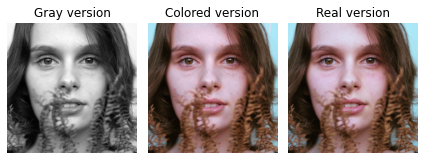

In [20]:
photo_gray = plt.imread(directory+"img_gray_version.png")
photo_result = plt.imread(directory+"img_result.png")
photo_real = plt.imread(directory+"woman.png")

figure, ax = plt.subplots(nrows=1, ncols=3)

ax.ravel()[0].imshow(photo_gray, cmap='gray')
ax.ravel()[0].set_title('Gray version')
ax.ravel()[0].set_axis_off()

ax.ravel()[1].imshow(photo_result)
ax.ravel()[1].set_title('Colored version')
ax.ravel()[1].set_axis_off()

ax.ravel()[2].imshow(photo_real)
ax.ravel()[2].set_title('Real version')
ax.ravel()[2].set_axis_off()

plt.tight_layout()
plt.show()

## Final version

In [2]:
import keras
import numpy as np
import os
import random
import tensorflow as tf

from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.engine import Layer
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate, Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard 
from keras.models import Sequential, Model, load_model
from keras.layers.core import RepeatVector, Permute
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# Image preprocessing

base_path = 'dataset_coloring/images/'
batch_size = 16
img_size = (256, 256)

# Image generator
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    rescale=1./255
)

datagen_test = ImageDataGenerator(rescale=1./255)

train_flow = datagen.flow_from_directory(
    base_path + 'train/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode=None
)

valid_flow = datagen.flow_from_directory(
    base_path + 'valid/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode=None
)

test_flow = datagen_test.flow_from_directory(
    base_path + 'test/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode=None
)

def create_inception_embedding(grayscaled_rgb):
    # Inception input
    grayscaled_rgb_resized = []
    for i in grayscaled_rgb:
        i = resize(i, (299, 299, 3), mode='constant')
        grayscaled_rgb_resized.append(i)
        
    grayscaled_rgb_resized = np.array(grayscaled_rgb_resized)
    grayscaled_rgb_resized = preprocess_input(grayscaled_rgb_resized)
    
    # Inception predictions
    embed = inception.predict(grayscaled_rgb_resized)
    return embed

def image_a_b_gen(data_flow):
    for batch in data_flow:
        # RGB to grayscale
        grayscaled_rgb = gray2rgb(rgb2gray(batch))
        # Grayscale to RGB 299x299
        embed = create_inception_embedding(grayscaled_rgb)
        
        # RGB to LAB
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        X_batch = X_batch.reshape(X_batch.shape+(1,))
        Y_batch = lab_batch[:,:,:,1:] / 128
        
        yield ([X_batch, embed], Y_batch)
        
def color_images(data_flow, result_path):
    j = 0
    for batch in data_flow:
        gray_me = gray2rgb(rgb2gray(batch))
        color_me_embed = create_inception_embedding(gray_me)
        color_me = rgb2lab(batch)[:,:,:,0]
        color_me = color_me.reshape(color_me.shape+(1,))

        # Test model
        output = model.predict([color_me, color_me_embed])
        output = output * 128
        
        # Output colorizations
        for i in range(len(output)):
            cur = np.zeros((256, 256, 3))
            cur[:,:,0] = color_me[i][:,:,0]
            cur[:,:,1:] = output[i]
            
            imsave(base_path+result_path+"img_"+str(i+j)+".png", lab2rgb(cur))
        j += batch_size
        if j > batch_size*len(data_flow): break

Found 8820 images belonging to 1 classes.
Found 474 images belonging to 1 classes.
Found 493 images belonging to 1 classes.


In [3]:
# Load inception model

inception = InceptionResNetV2(weights="imagenet", include_top=True)

# 1000 Inception vector given by classification when data is generated
embed_input = Input(shape=(1000,))

# 2 input model
# 256x256 -> encoder-decoder

#Encoder
encoder_input = Input(shape=(256, 256, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)

#Fusion
enc_img_size = encoder_output.shape[1]
embed_size = embed_input.shape[1]

fusion_output = RepeatVector(enc_img_size * enc_img_size)(embed_input) 
fusion_output = Reshape(([enc_img_size, enc_img_size, embed_size]))(fusion_output)
fusion_output = concatenate([encoder_output, fusion_output], axis=3) 
fusion_output = Conv2D(256, (1, 1), activation='relu', padding='same')(fusion_output) 

#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(fusion_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)

# Enconder grayscale input
# Inception classification embed input
model = Model(inputs=[encoder_input, embed_input], outputs=decoder_output)
model.compile(optimizer='adam', loss='mse') # o rmsprop
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 128, 128, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 128, 128, 128 73856       conv2d_203[0][0]                 
__________________________________________________________________________________________________
conv2d_205 (Conv2D)             (None, 64, 64, 128)  147584      conv2d_204[0][0]                 
_______________________________________________________________________________________

In [ ]:
# Done on google collab
model.fit(image_a_b_gen(train_flow), epochs=1, steps_per_epoch=5)

### Validation

In [ ]:
# Done on google collab

In [ ]:
# Load inception model
inception = InceptionResNetV2(weights="imagenet", include_top=True)

In [ ]:
model = load_model('models_coloring/final_version_epoch_5.h5')
model.evaluate(image_a_b_gen(valid_flow))
del model
# loss: 0.0108

In [ ]:
model = load_model('models_coloring/final_version_epoch_10.h5')
model.evaluate(image_a_b_gen(valid_flow))
del model
# loss: 0.0099

In [ ]:
model = load_model('models_coloring/final_version_epoch_15.h5')
model.evaluate(image_a_b_gen(valid_flow))
del model
# loss: 0.0108

In [ ]:
model = load_model('models_coloring/final_version_epoch_20.h5')
model.evaluate(image_a_b_gen(valid_flow))
del model
# loss: 0.0099

In [ ]:
model = load_model('models_coloring/final_version_epoch_25.h5')
model.evaluate(image_a_b_gen(valid_flow))
del model
# loss: 0.0100

In [ ]:
model = load_model('models_coloring/final_version_epoch_30.h5')
model.evaluate(image_a_b_gen(valid_flow))
del model
# loss: 0.0109

In [ ]:
model = load_model('models_coloring/final_version_epoch_35.h5')
model.evaluate(image_a_b_gen(valid_flow))
del model
# loss: 0.0098

In [ ]:
model = load_model('models_coloring/final_version_epoch_40.h5')
model.evaluate(image_a_b_gen(valid_flow))
del model
# loss: 0.0098

In [ ]:
model = load_model('models_coloring/final_version_epoch_45.h5')
model.evaluate(image_a_b_gen(valid_flow))
del model
# loss: 0.0098

In [ ]:
model = load_model('models_coloring/final_version_epoch_50.h5')
model.evaluate(image_a_b_gen(valid_flow))
del model
# loss: 0.0101

### Test

In [4]:
# Load inception model
inception = InceptionResNetV2(weights="imagenet", include_top=True)

In [5]:
model = load_model('models_coloring/final_version_epoch_45.h5')
color_images(test_flow, 'result_45/')

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: dataset_coloring/images/result_45/img_214.png is a low contrast image
Lossy conve

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: dataset_coloring/images/result_45/img_344.png is a low contrast image
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conve

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [6]:
model = load_model('models_coloring/final_version_epoch_50.h5')
color_images(test_flow, 'result_50/')

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0